# Exploratory Data Analysis (EDA) for Ames Housing Dataset
This notebook performs an exploratory data analysis on the Ames Housing dataset, visualizing the target variable and key features, and analyzing their relationships.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/workspaces/house-price-prediction/data/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 1. Analyze the Target Variable (SalePrice)
Visualize the distribution and summary statistics of the target variable `SalePrice`.

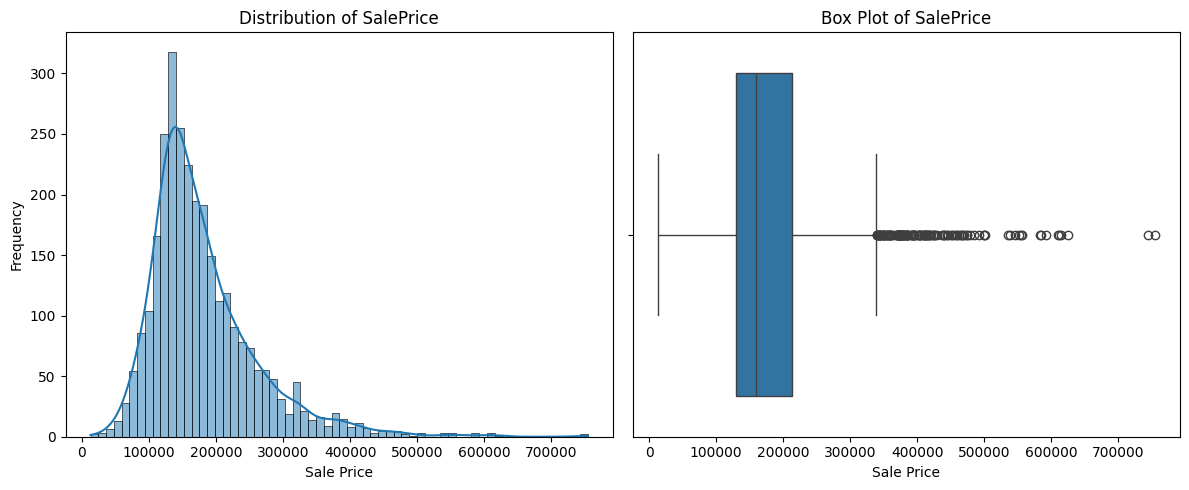

In [5]:
# Set up the figure and axes
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.xlabel('Sale Price')

plt.tight_layout()
plt.show()

In [6]:
# Calculate skewness and kurtosis
saleprice_skewness = df['SalePrice'].skew()
saleprice_kurtosis = df['SalePrice'].kurt()
print(f"SalePrice Skewness: {saleprice_skewness}")
print(f"SalePrice Kurtosis: {saleprice_kurtosis}\n")

SalePrice Skewness: 1.7435000757376466
SalePrice Kurtosis: 5.118899951130896



## 2. Analyze Key Numerical Features vs. Target Variable
Visualize the relationship between `SalePrice` and important numerical features.

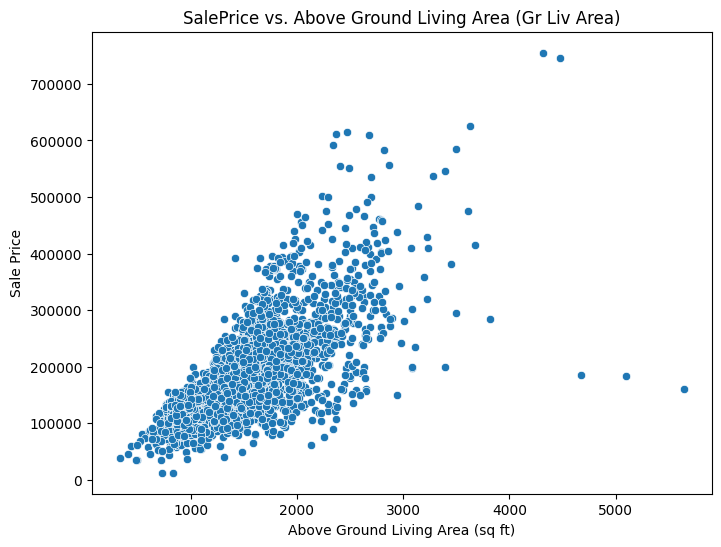

In [7]:
# Scatter plot: Gr Liv Area vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.title('SalePrice vs. Above Ground Living Area (Gr Liv Area)')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

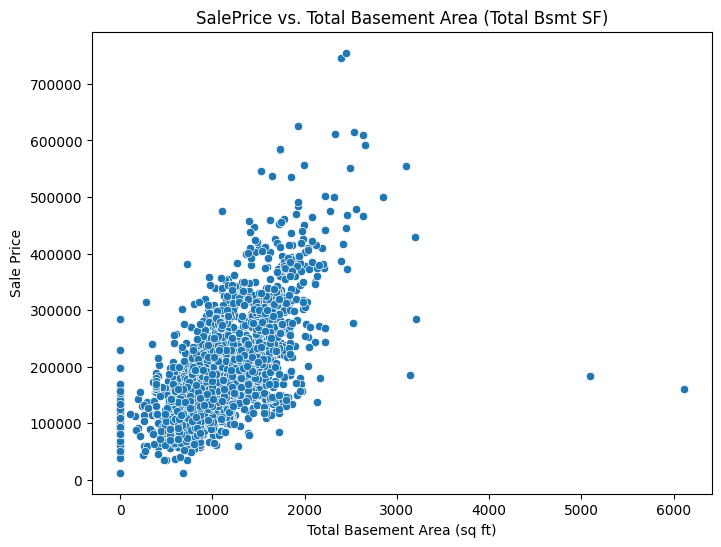

In [8]:
# Scatter plot: Total Bsmt SF vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Total Bsmt SF'], y=df['SalePrice'])
plt.title('SalePrice vs. Total Basement Area (Total Bsmt SF)')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

## 3. Analyze Key Categorical/Ordinal Features vs. Target Variable
Visualize the relationship between `SalePrice` and important categorical/ordinal features.

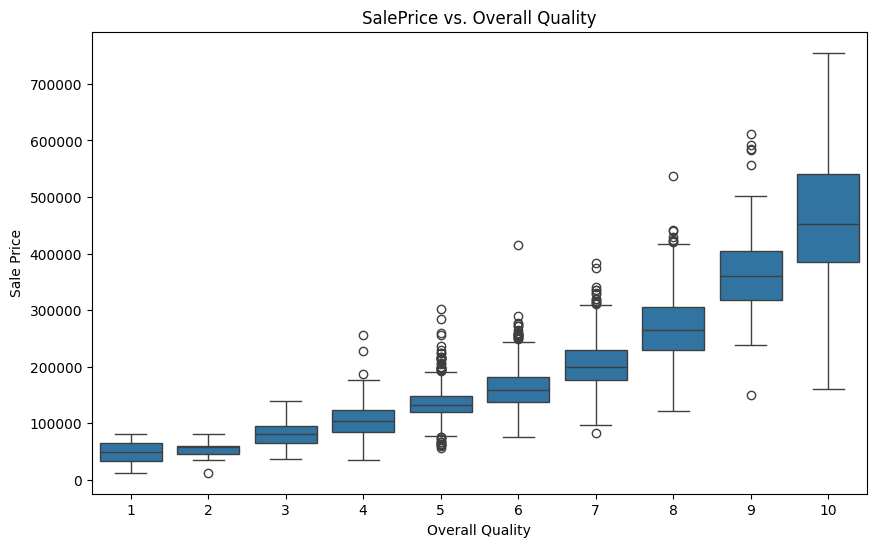

In [9]:
# Box plot: Overall Qual vs. SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Overall Qual'], y=df['SalePrice'])
plt.title('SalePrice vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

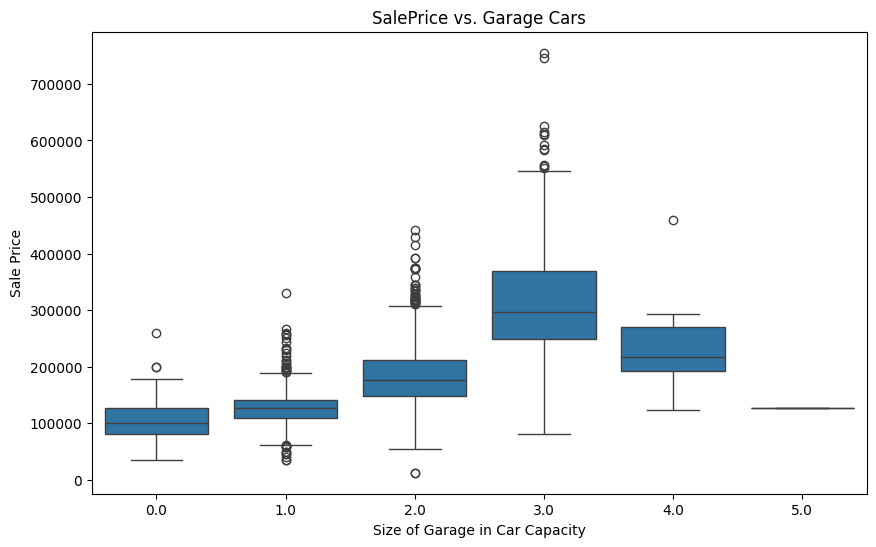

In [10]:
# Box plot: Garage Cars vs. SalePrice
plt.figure(figsize=(10, 6))
df_cleaned = df.dropna(subset=['Garage Cars'])
sns.boxplot(x=df_cleaned['Garage Cars'], y=df_cleaned['SalePrice'])
plt.title('SalePrice vs. Garage Cars')
plt.xlabel('Size of Garage in Car Capacity')
plt.ylabel('Sale Price')
plt.show()

## 4. Correlation Analysis
Show the correlation matrix for key numerical features.

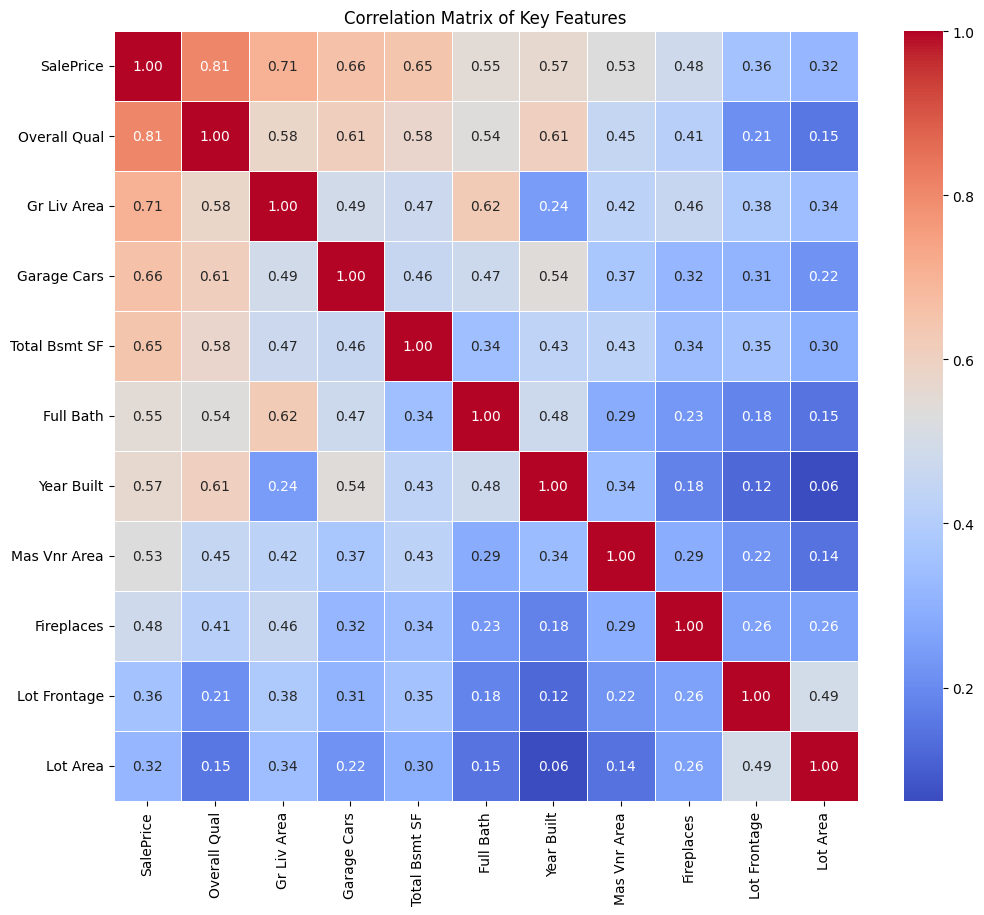

In [11]:
# Select top numerical features for correlation heatmap
correlation_cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Full Bath', 'Year Built', 'Mas Vnr Area', 'Fireplaces', 'Lot Frontage', 'Lot Area']
df_corr = df[correlation_cols].dropna()
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()